In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# import iDEA
# import pickle
# import time
# from pathlib import Path

# # Initialize the system
# points = 231
# l = 10
# x = np.linspace(-l, l, points)
# dx = x[1] - x[0]
# omega = 0.3275
# v_ext = 0.5 * omega**2 * (x**2)
# v_int = np.zeros([len(x), len(x)])
# qho_single = iDEA.system.System(x, v_ext, v_int, electrons="u")
# qho_double = iDEA.system.System(x, v_ext, v_int, electrons="ud")


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import iDEA
import pickle
import time
from pathlib import Path
from multiplet_classes import CollectionOfStates
import multiplet_methods as mm

states_small_int = {}
states_zero_int = {}
occupied_info = []

directory = Path("states")

for i in range(0, 51):
    file_path = directory / f"qho_small_int_state_{i}_1e-11.pkl"
    try:
        with file_path.open("rb") as file:
            states_small_int[i] = pickle.load(file)
    except FileNotFoundError:
        print(f"File state_{i}.pkl not found.")
    except Exception as e:
        print(f"An error occurred while loading state_{i}.pkl: {e}")

for i in range(0, 51):
    file_path = directory / f"qho_zero_int_state_{i}.pkl"
    try:
        with file_path.open("rb") as file:
            states_zero_int[i] = pickle.load(file)
    except FileNotFoundError:
        print(f"File state_{i}.pkl not found.")
    except Exception as e:
        print(f"An error occurred while loading state_{i}.pkl: {e}")

# file_path = "occupied_info_231.pkl"
# with open(file_path, "rb") as file:
#     occupied_info = pickle.load(file)





In [3]:
# energies_single = []
# for key, value in states_single.items():
#     energies_single.append(value.energy)

# energies_double = []
# for key, value in states_double.items():
#     energies_double.append(value.energy)

# analytic_energies = []
# for i in range(len(energies_single)):
#     energy = omega*(i + 0.5)
#     analytic_energies.append(energy)


In [4]:
with open("qho_energies_small_int_0_199.pkl", "rb") as file:
    energies_small_int = pickle.load(file)

with open("qho_energies_non_int_0_199.pkl", "rb") as file:
    energies_non_int = pickle.load(file)

with open("qho_energies_zero_int_0_199.pkl", "rb") as file:
    energies_zero_int = pickle.load(file)

print(len(energies_zero_int), len(energies_small_int), len(energies_non_int))

116 116 115


In [5]:
# class States:
#     def __init__(self, energy):
#         self.states = []
#         self.energy = energy

#     def addState(self, state):
#         self.states.append(state)

#     def getStates(self):
#         return self.states

#     def getEnergy(self):
#         return self.energy

# Initialize the system
points = 231
l = 10
x = np.linspace(-l, l, points)
dx = x[1] - x[0]
omega = 0.3275
v_ext = 0.5 * omega**2 * (x**2)
v_int = np.zeros([len(x), len(x)])
qho_single = iDEA.system.System(x, v_ext, v_int, electrons="u")
qho_double = iDEA.system.System(x, v_ext, v_int, electrons="ud")

def qho_energy(index):
    return omega * (index + 0.5)

analytic = mm.calculate_energy(qho_energy, qho_double, 200)
mm.calculate_multiplets(analytic)

def run_comparison(energies_list_1, energies_list_2, legend, zoom=None, tol=1e-12):
    

    # plot graph
    plt.plot(np.round(energies_list_1, decimals=4), color="green", marker="x")
    plt.plot(np.round(energies_list_2, decimals=4), color="red", marker="x")
    plt.xlabel("State number")
    plt.ylabel("Energy of state")
    plt.grid()
    if zoom != None:
        plt.xlim(zoom[0], zoom[1])
        plt.title(f"Plot for states {zoom[0]} to {zoom[1]}")
    
    plt.title(f"Plot for states {0} to {len(energies_list_2)-1}")
    plt.legend(legend)

    print(f"Do list 1 and list 2 energies match up: {np.allclose(energies_list_2, energies_list_1)}")


    states_1 = CollectionOfStates(len(energies_list_1))
    states_1.energies = energies_list_1
    
    states_2 = CollectionOfStates(len(energies_list_2))
    states_2.energies = energies_list_2

    mm.calculate_multiplets(states_1, tol)
    mm.calculate_multiplets(states_2, tol)
    for i in range(len(states_1.multiplets)):
        print(f"From List 1: Multiplet: {states_1.multiplets[i]}, Energy: {states_1.multiplet_energies[i]}")
        print(f"From List 2: Multiplet: {states_2.multiplets[i]}, Energy: {states_2.multiplet_energies[i]}")
        print("--")
    
    print(f"List 1 Multiplet comparison: {analytic.check_expected_num_of_multiplets(states_1.multiplets, states_1.multiplet_energies, break_first=False)}")
    print(f"List 2 Multiplet compatison: {analytic.check_expected_num_of_multiplets(states_2.multiplets, states_2.multiplet_energies, break_first=False)}")

    
    # summary = []
    # j = 0

    # while j < len(energies_int):
    #     if j > 0 and np.abs(energies_int[j] - energies_int[j-1]) <= tol:
    #         # print(f"States {j-1}, {j}, ", end='')
    #         deg_states = States(energies_int[j])
    #         deg_states.addState(j-1)
    #         deg_states.addState(j)
    #         i = j + 1
    #         while i < len(energies_int):
    #             if np.abs(energies_int[i] - energies_int[i-1]) <= tol:
    #                 # print(i, end=', ')
    #                 deg_states.addState(i)
    #                 i += 1
    #             else:
    #                 break
    #         summary.append(deg_states)
    #         # print(f"have the same energy: {energies_interacting_100[j]}")
    #         j = i  # Move the outer loop index to the end of current degenerate states
    #     else:
    #         j += 1

    # # Print the summary of degenerate states
    # multiplets = []
    # multiplet_energies = []
    # for deg_states in summary:
    #     states = deg_states.getStates()
    #     multiplets.append(states)
    #     energy = deg_states.getEnergy()
    #     multiplet_energies.append(energy)

    #     print(f"For small interaction: Degenerate states: {states}, Degeneracy: {len(states)}, Energy: {energy}")
    
    # with open(f"small_multiplets_0_200.pkl", "wb") as file:
    #     pickle.dump(multiplets, file)
    #     print("Done")
    # with open(f"small_multiplets_energies_0_200.pkl", "wb") as file:
    #     pickle.dump(multiplet_energies, file)
    #     print("Done")

File indices_up_to_20.pkl exists
Elapsed Time = 0.010548573000050965


In [6]:
# # plot the energies

# # energies_double = np.round(energies_double, decimals=7)
# # energies_single = np.round(energies_single, decimals=7)
# # analytic_energies = np.round(analytic_energies, decimals=7)

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
# ax1.set_xlim(-10, 10)
# ax2.set_xlim(-10, 10)
# ax3.set_xlim(-10, 10)
# for i, value in enumerate(energies_double):
#     ax1.axhline(y=value, color='b', linestyle='-')
#     if energies_double[i] == energies_double[i-1]:
#         ax1.text(x=21, y=value, s=f'{value}', color='black', va='center', ha='right')
#     else:
#         ax1.text(x=21, y=value, s=f'{value}', color='red', va='center', ha='right')

# for i, value in enumerate(energies_single):
#     ax2.axhline(y=value, color='b', linestyle='-')
#     ax2.text(x=21, y=value, s=f'{value}', color='red', va='center', ha='right')

# for i, value in enumerate(analytic_energies):
#     ax3.axhline(y=value, color='b', linestyle='-')
#     ax3.text(x=21, y=value, s=f'{value}', color='red', va='center', ha='right')

# ax1.set_title('Plot of energies from \n interacting method "ud"')
# ax2.set_title('Plot of energies from \n interacting method "u"')
# ax1.set_xlabel("Box")
# ax1.set_ylabel("Energies")
# ax2.set_xlabel("Box")
# ax2.set_ylabel("Energies")
# plt.tight_layout()
# plt.savefig("qho_energy_levels")
# plt.show()

In [7]:
# for i in range(len(energies_single)):
#     print(f"State {i}: Got {energies_single[i]}, Expected {analytic_energies[i]}")

In [8]:
for elm in analytic.multiplets:
    print(elm)

print(analytic.get_num_of_multiplets())
print(analytic.get_deg_of_multiplets())

[1, 2]
[3, 4, 5]
[6, 7, 8, 9]
[10, 11, 12, 13, 14]
[15, 16, 17, 18, 19, 20]
[21, 22, 23, 24, 25, 26, 27]
[28, 29, 30, 31, 32, 33, 34, 35]
[36, 37, 38, 39, 40, 41, 42, 43, 44]
[45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
[55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]
[66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
[78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]
[91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104]
[105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
[120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]
[136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152]
[153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170]
[171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189]
18
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


Do list 1 and list 2 energies match up: True
From List 1: Multiplet: [1, 2], Energy: 0.65500000000045
From List 2: Multiplet: [1, 2], Energy: 0.6550000000004403
--
From List 1: Multiplet: [3, 4, 5], Energy: 0.9825000000150969
From List 2: Multiplet: [3, 4, 5], Energy: 0.982500000015056
--
From List 1: Multiplet: [6, 7, 8, 9], Energy: 1.3100000000155558
From List 2: Multiplet: [6, 7, 8, 9], Energy: 1.310000000015685
--
From List 1: Multiplet: [10, 11, 12, 13, 14], Energy: 1.637500000304584
From List 2: Multiplet: [10, 11, 12, 13, 14], Energy: 1.6375000003043811
--
From List 1: Multiplet: [15, 16, 17, 18, 19, 20], Energy: 1.965000000319231
From List 2: Multiplet: [15, 16, 17, 18, 19, 20], Energy: 1.9650000003193004
--
From List 1: Multiplet: [21, 22, 23, 24, 25, 26, 27], Energy: 2.292500004434202
From List 2: Multiplet: [21, 22, 23, 24, 25, 26, 27], Energy: 2.2925000044342245
--
From List 1: Multiplet: [28, 29, 30, 31, 32, 33, 34, 35], Energy: 2.62000000472323
From List 2: Multiplet: [28

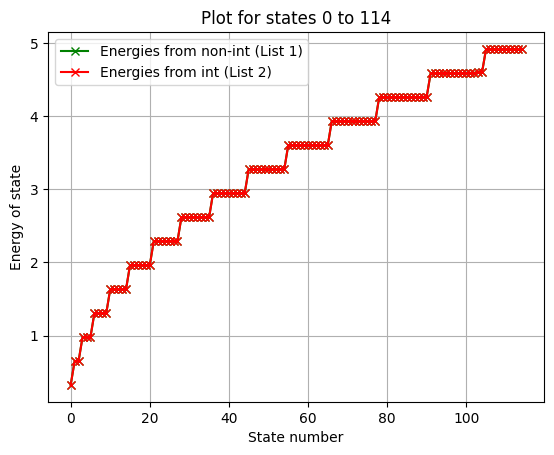

In [9]:
legend = ["Energies from non-int (List 1)", "Energies from int (List 2)"]
run_comparison(energies_non_int, energies_zero_int[:-1], legend, tol=1e-2)

Do list 1 and list 2 energies match up: True
From List 1: Multiplet: [1, 2], Energy: 0.6550000000054604
From List 2: Multiplet: [1, 2], Energy: 0.6550000000004403
--
From List 1: Multiplet: [3, 4, 5], Energy: 0.9825000000180119
From List 2: Multiplet: [3, 4, 5], Energy: 0.982500000015056
--
From List 1: Multiplet: [6, 7, 8, 9], Energy: 1.310000000020095
From List 2: Multiplet: [6, 7, 8, 9], Energy: 1.310000000015685
--
From List 1: Multiplet: [10, 11, 12, 13, 14], Energy: 1.637500000307344
From List 2: Multiplet: [10, 11, 12, 13, 14], Energy: 1.6375000003043811
--
From List 1: Multiplet: [15, 16, 17, 18, 19, 20], Energy: 1.9650000003232755
From List 2: Multiplet: [15, 16, 17, 18, 19, 20], Energy: 1.9650000003193004
--
From List 1: Multiplet: [21, 22, 23, 24, 25, 26, 27], Energy: 2.292500004436721
From List 2: Multiplet: [21, 22, 23, 24, 25, 26, 27], Energy: 2.2925000044342245
--
From List 1: Multiplet: [28, 29, 30, 31, 32, 33, 34, 35], Energy: 2.62000000472728
From List 2: Multiplet: [

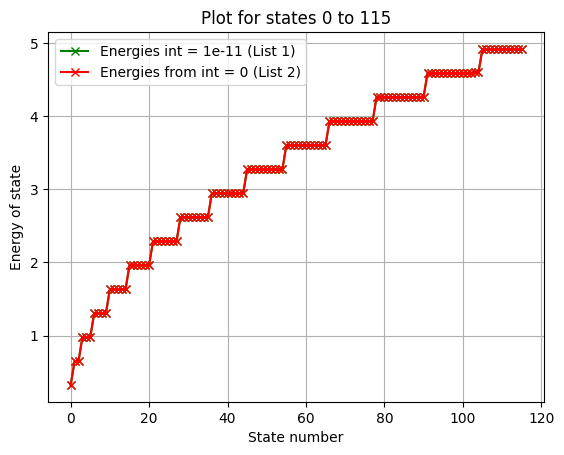

In [16]:
legend = ["Energies int = 1e-11 (List 1)", "Energies from int = 0 (List 2)"]
run_comparison(energies_small_int, energies_zero_int, legend, tol=1e-3)

In [13]:
for i, elm in enumerate(energies_small_int):
    print(f"State {i}, energy = {elm}")

State 0, energy = 0.3275000000050162
State 1, energy = 0.65500000000333
State 2, energy = 0.6550000000054604
State 3, energy = 0.9825000000047854
State 4, energy = 0.9825000000180119
State 5, energy = 0.982500000019164
State 6, energy = 1.3100000000180325
State 7, energy = 1.310000000020095
State 8, energy = 1.3100000003070105
State 9, energy = 1.310000000307505
State 10, energy = 1.6375000000337134
State 11, energy = 1.637500000307344
State 12, energy = 1.637500000308409
State 13, energy = 1.6375000044217116
State 14, energy = 1.6375000044222372
State 15, energy = 1.965000000321521
State 16, energy = 1.9650000003232755
State 17, energy = 1.9650000044220506
State 18, energy = 1.965000004422921
State 19, energy = 1.9650000494203836
State 20, energy = 1.96500004942088
State 21, energy = 2.2925000006115184
State 22, energy = 2.292500004436721
State 23, energy = 2.29250000443774
State 24, energy = 2.2925000494209904
State 25, energy = 2.2925000494214194
State 26, energy = 2.292500441935661